In [65]:
import numpy as np
import pandas as pd
import datetime
import quandl

In [3]:
quandl.ApiConfig.api_key = 'sGoMaA6d9ssqDr7J88iS'
palladium_data = quandl.get("JOHNMATT/PALL", start_date = "2018-01-01", end_date = "2018-12-31")
palladium_data.head()

,Hong Kong 8:30,Hong Kong 14:00,London 09:00,New York 9:30
Date,,,,
2018-01-02,1073.0,1078.0,1077.0,1089.0
2018-01-03,1100.0,1098.0,1095.0,1091.0
2018-01-04,1088.0,1090.0,1104.0,1104.0
2018-01-05,1106.0,1106.0,1104.0,1096.0
2018-01-08,1100.0,1101.0,1104.0,1097.0


In [4]:
palladium_data['New York 9:30'].count()

246

In [5]:
gold_data = quandl.get("WGC/GOLD_DAILY_USD", start_date = "2018-01-01", end_date = "2018-12-31")
gold_data.head()

,Value
Date,
2018-01-01,1291.00
2018-01-02,1312.05
2018-01-03,1314.90
2018-01-04,1314.50
2018-01-05,1317.15


In [6]:
gold_data.count()

Value    261
dtype: int64

In [7]:
platinum_prices = quandl.get("LPPM/PLAT", start_date = "2018-01-01", end_date = "2018-12-31")
platinum_prices.head()

,USD AM,EUR AM,GBP AM,USD PM,EUR PM,GBP PM
Date,,,,,,
2018-01-02,937.0,776.63,690.75,936.0,776.44,690.52
2018-01-03,944.0,784.05,694.88,951.0,790.85,701.59
2018-01-04,953.0,791.86,703.84,959.0,794.53,708.53
2018-01-05,963.0,799.50,711.75,966.0,801.33,712.13
2018-01-08,967.0,806.51,714.97,971.0,811.19,716.87


In [8]:
platinum_prices['USD PM'].count()

250

In [9]:
bitcoin_data = quandl.get("BCHAIN/MKPRU", start_date = "2018-01-01", end_date = "2018-12-31")
bitcoin_data.head()

,Value
Date,
2018-01-01,14165.575000
2018-01-02,13812.186667
2018-01-03,15005.856667
2018-01-04,15053.261667
2018-01-05,15199.355000


In [10]:
bitcoin_data.count()

Value    365
dtype: int64

In [11]:
cornprices = quandl.get("TFGRAIN/CORN", start_date = "2018-01-01", end_date = "2018-12-31")
cornprices.head()

,Cash Price,Basis,Fall Price,Fall Basis
Date,,,,
2018-01-02,3.32,-0.21,3.60,-0.27
2018-01-03,3.32,-0.21,3.59,-0.27
2018-01-04,3.30,-0.21,3.58,-0.27
2018-01-05,3.30,-0.21,3.58,-0.27
2018-01-08,3.27,-0.20,3.54,-0.27


In [12]:
cornprices['Cash Price'].count()

251

In [13]:
import requests
import json

In [14]:
#S&P 500 INDEX
url1 = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=.INX&outputsize=full&apikey=TH8ZR2EQ6CE0D84Y'
sp = requests.get(url1)
data = sp.json()
sp500 = pd.DataFrame(data["Time Series (Daily)"]) #constructing a DataFrame using the JSON
sp500 = sp500.T
dateRange = pd.DataFrame(sp500.loc['2018-12-31':'2018-01-01']) #constructing a new DataFrame with a specific date range 
dateRange.iloc[::-1].head()

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
2018-01-02,2683.7300,2695.8899,2682.3601,2695.8101,2695.8101,3367250000,0.0000,1.0000
2018-01-03,2697.8501,2714.3701,2697.7700,2713.0601,2713.0601,3538660000,0.0000,1.0000
2018-01-04,2719.3101,2729.2900,2719.0701,2723.9900,2723.9900,3695260000,0.0000,1.0000
2018-01-05,2731.3301,2743.4500,2727.9199,2743.1499,2743.1499,3236620000,0.0000,1.0000
2018-01-08,2742.6699,2748.5100,2737.6001,2747.7100,2747.7100,3242650000,0.0000,1.0000


In [15]:
len(dateRange)

251

Part 2.


Section A. 
Calculate daily % change for each of the asset and the S&P. Display the first 5 rows and the total count for each data set.

In [16]:
palladium = palladium_data['New York 9:30'].pct_change() # palladium
palladium.head()

Date
2018-01-02         NaN
2018-01-03    0.001837
2018-01-04    0.011916
2018-01-05   -0.007246
2018-01-08    0.000912
Name: New York 9:30, dtype: float64

In [17]:
gold = gold_data.pct_change() # gold
gold.head()

,Value
Date,
2018-01-01,NaN
2018-01-02,0.016305
2018-01-03,0.002172
2018-01-04,-0.000304
2018-01-05,0.002016


In [18]:
bitcoin = bitcoin_data.pct_change() # bitcoin
bitcoin.head()

,Value
Date,
2018-01-01,NaN
2018-01-02,-0.024947
2018-01-03,0.086422
2018-01-04,0.003159
2018-01-05,0.009705


In [19]:
platinum = platinum_prices['USD PM'].pct_change() # platinum
platinum.head()

Date
2018-01-02         NaN
2018-01-03    0.016026
2018-01-04    0.008412
2018-01-05    0.007299
2018-01-08    0.005176
Name: USD PM, dtype: float64

In [20]:
corn = cornprices['Cash Price'].pct_change() # corn
corn.head()

Date
2018-01-02         NaN
2018-01-03    0.000000
2018-01-04   -0.006024
2018-01-05    0.000000
2018-01-08   -0.009091
Name: Cash Price, dtype: float64

In [21]:
sp500_close = dateRange.iloc[::-1]['4. close'].astype(np.float64).pct_change() # sp500
sp500_close.head()

2018-01-02         NaN
2018-01-03    0.006399
2018-01-04    0.004029
2018-01-05    0.007034
2018-01-08    0.001662
Name: 4. close, dtype: float64

Section B. Plot the daily % change data using a bar graph for each asset. 

In [22]:
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.ticker as ticker

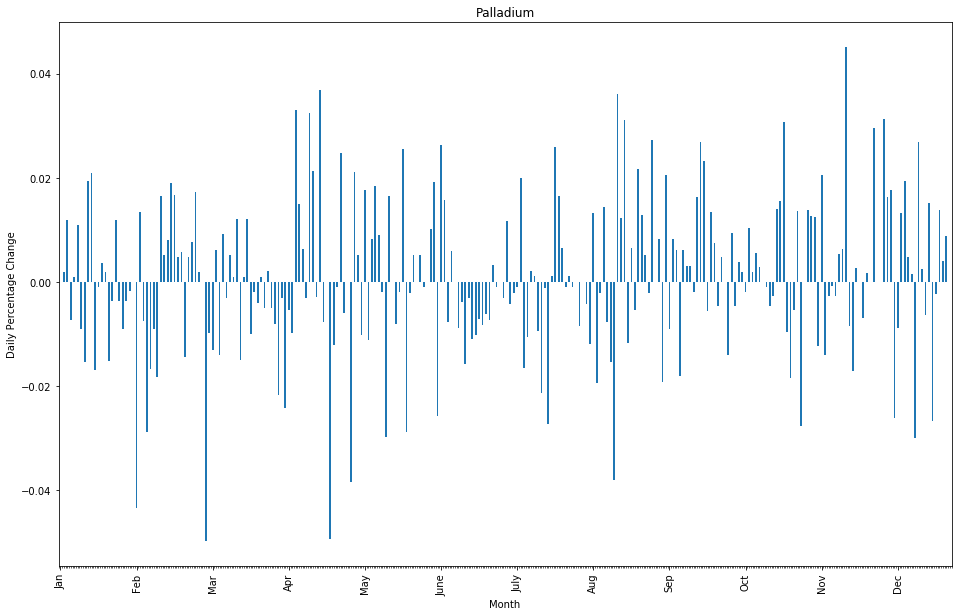

In [69]:
month =[" ","Jan", "Feb","Mar", "Apr", "May", "June", "July", "Aug", "Sep", "Oct", "Nov", "Dec"," "]
graph_1=palladium.plot.bar()
plt.ylabel('Daily Percentage Change')
plt.xlabel('Month')
plt.title('Palladium')
graph_1.xaxis.set_major_locator(ticker.MultipleLocator(22.00))
graph_1.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
graph_1.xaxis.set_major_formatter(ticker.FixedFormatter(month))
minors = [""] + ["%.2f" % (x-int(x)) 
                 if (x-int(x))
                 else "" 
                 for x in np.arange(0, 13, 1.0)]
graph_1.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))
plt.rcParams['figure.figsize'] = (16,10)

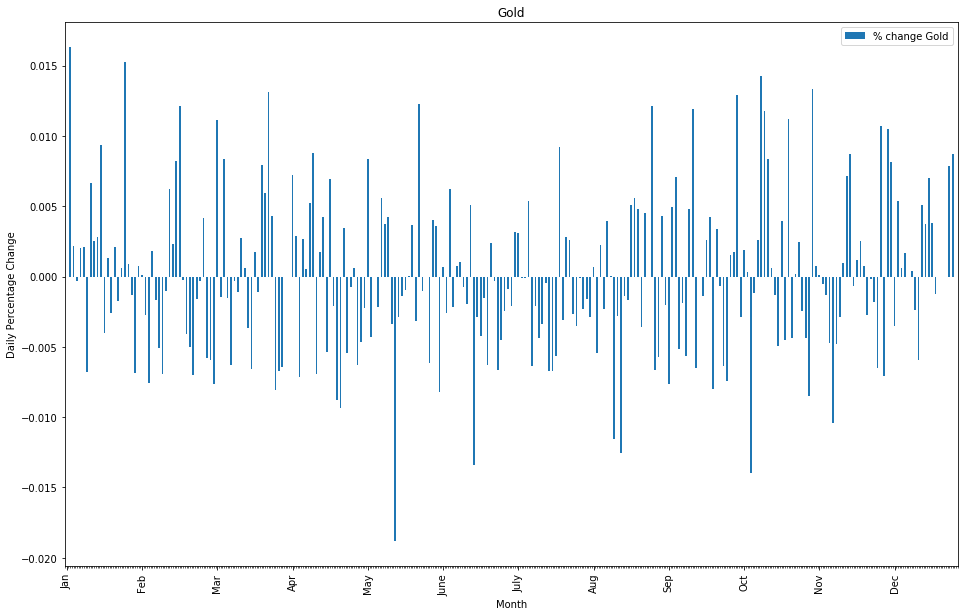

In [68]:
graph_2=gold.plot.bar()
plt.ylabel('Daily Percentage Change')
plt.xlabel('Month')
plt.title('Gold')
graph_2.xaxis.set_major_locator(ticker.MultipleLocator(22.00))
graph_2.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
graph_2.xaxis.set_major_formatter(ticker.FixedFormatter(month))
graph_2.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))


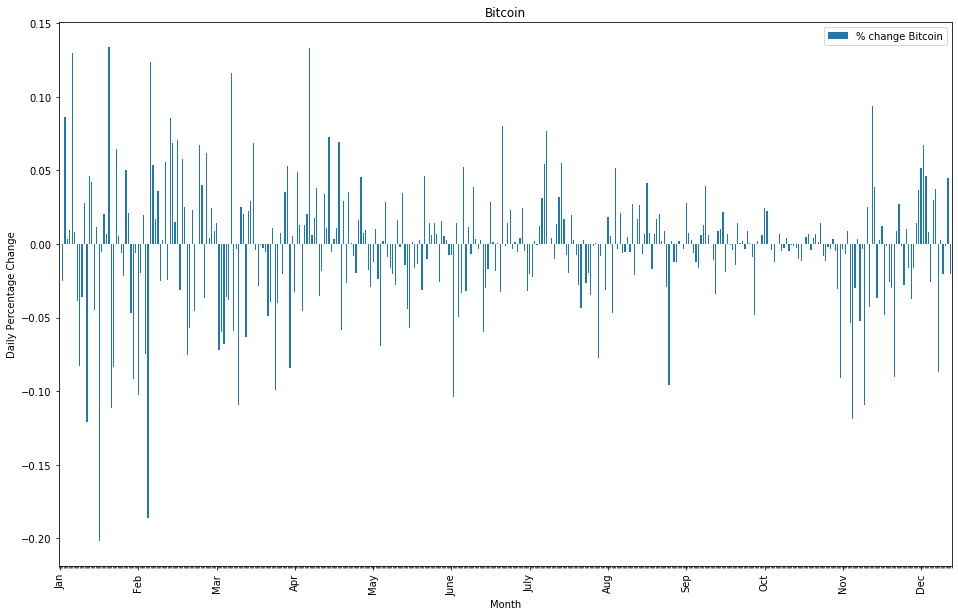

In [70]:
graph_3=bitcoin.plot.bar()
plt.ylabel('Daily Percentage Change')
plt.xlabel('Month')
plt.title('Bitcoin')
graph_3.xaxis.set_major_locator(ticker.MultipleLocator(32.00))
graph_3.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
graph_3.xaxis.set_major_formatter(ticker.FixedFormatter(month))
graph_3.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))


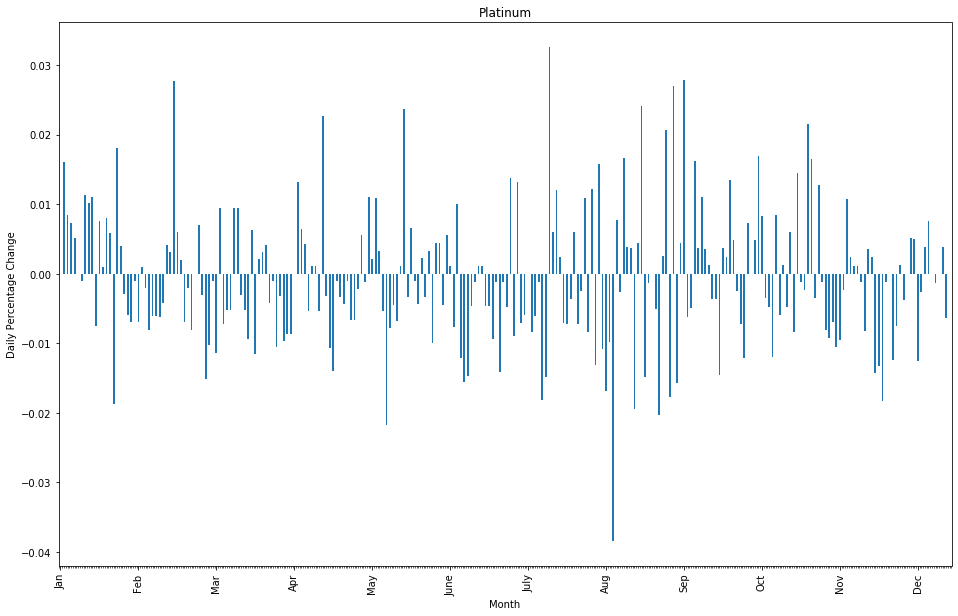

In [72]:
graph_4=platinum.plot.bar()
plt.ylabel('Daily Percentage Change')
plt.xlabel('Month')
plt.title('Platinum')
graph_4.xaxis.set_major_locator(ticker.MultipleLocator(22.00))
graph_4.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
graph_4.xaxis.set_major_formatter(ticker.FixedFormatter(month))
graph_4.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))


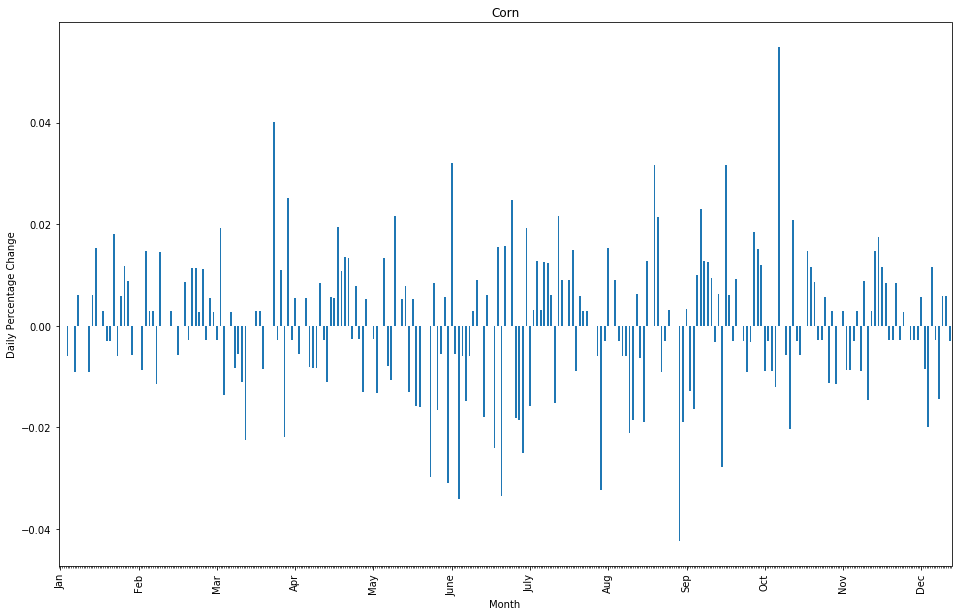

In [73]:
graph_5=corn.plot.bar()
plt.ylabel('Daily Percentage Change')
plt.xlabel('Month')
plt.title('Corn')
graph_5.xaxis.set_major_locator(ticker.MultipleLocator(22.00))
graph_5.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
graph_5.xaxis.set_major_formatter(ticker.FixedFormatter(month))
graph_5.xaxis.set_minor_formatter(ticker.FixedFormatter(minors))

Section C. Calculate and display the mean, standard deviation, variance, min, and max for each set of data. 

In [29]:
palladium.describe()

count    257.000000
mean       0.000710
std        0.014767
min       -0.049859
25%       -0.007612
50%        0.000000
75%        0.009193
max        0.045093
Name: New York 9:30, dtype: float64

In [30]:
palladium.var()

0.00021806309723579944

In [31]:
gold.describe()

,Value
count,260.000000
mean,-0.000020
std,0.005593
min,-0.018828
25%,-0.003559
50%,-0.000232
75%,0.003128
max,0.016305


In [32]:
gold.var()

Value    0.000031
dtype: float64

In [33]:
bitcoin.describe()

,Value
count,364.000000
mean,-0.002716
std,0.041286
min,-0.202052
25%,-0.020114
50%,0.000150
75%,0.014583
max,0.133803


In [34]:
bitcoin.var()

Value    0.001705
dtype: float64

In [35]:
platinum.describe()

count    251.000000
mean      -0.000639
std        0.009715
min       -0.038462
25%       -0.006938
50%       -0.001182
75%        0.004460
max        0.032581
Name: USD PM, dtype: float64

In [36]:
platinum.var()

9.437298324976734e-05

In [37]:
corn.describe()

count    250.000000
mean       0.000245
std        0.012670
min       -0.042424
25%       -0.005984
50%        0.000000
75%        0.007890
max        0.054878
Name: Cash Price, dtype: float64

In [38]:
corn.var()

0.00016051866337383217

In [39]:
sp500_close.describe()

count    250.000000
mean      -0.000233
std        0.010749
min       -0.040979
25%       -0.004818
50%        0.000365
75%        0.005407
max        0.049594
Name: 4. close, dtype: float64

In [40]:
sp500_close.var()

0.00011555110314200734

Part 3.

Section A. Using scikit-learn, perform five linear regressions for each of the five assets against the S&P 500. Y should be % change S&P 500. X should be % change for each asset.

In [41]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()

In [42]:
# linear palladium vs sp500
dfpalladium = pd.DataFrame(palladium).astype(float)
dfpalladium.columns = ['% change Palladium']
dfsp500 = pd.DataFrame(sp500_close)
dfsp500.columns = ['% change S&P 500']
regpalladium = reg.fit(dfpalladium[1:len(dfsp500)][['% change Palladium']], dfsp500[1:][['% change S&P 500']])
palladium_pred = reg.predict(dfpalladium[1:][['% change Palladium']])

In [43]:
# linear gold vs sp500
gold.columns = ['% change Gold']
reggold = reg.fit(gold[1:len(dfsp500)][['% change Gold']], dfsp500[1:][['% change S&P 500']])
gold_pred = reg.predict(gold[1:][['% change Gold']])

In [44]:
# linear bitcoin vs sp500
bitcoin.columns = ['% change Bitcoin']
regbitcoin = reg.fit(bitcoin[1:len(dfsp500)][['% change Bitcoin']], dfsp500[1:][['% change S&P 500']])
bitcoin_pred = reg.predict(bitcoin[1:][['% change Bitcoin']])

In [45]:
# linear platinum vs sp500
dfplatinum = pd.DataFrame(platinum)
dfplatinum.columns = ['% change Platinum']
regplatinum = reg.fit(dfplatinum[1:len(dfsp500)][['% change Platinum']], dfsp500[1:][['% change S&P 500']])
platinum_pred = reg.predict(dfplatinum[1:][['% change Platinum']])

In [46]:
# linear corn vs sp500
dfcorn = pd.DataFrame(corn)
dfcorn.columns = ['% change Corn']
regcorn = reg.fit(dfcorn[1:][['% change Corn']], dfsp500[1:][['% change S&P 500']])
corn_pred = reg.predict(dfcorn[1:][['% change Corn']])

Section B. For each regression, plot the samples and the linear model. Label the Y axis as S&P 500 and the X axis as each asset.

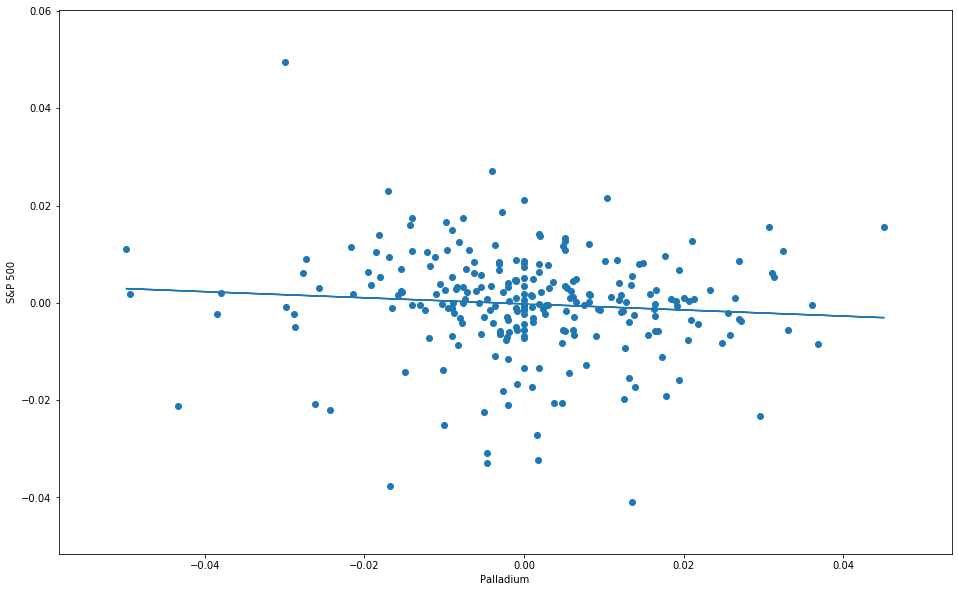

In [47]:
# palladium
plt.xlabel('Palladium')
plt.ylabel('S&P 500')
plt.scatter(dfpalladium[:len(dfsp500)]['% change Palladium'], dfsp500['% change S&P 500'])
plt.plot(dfpalladium[1:]['% change Palladium'], palladium_pred)

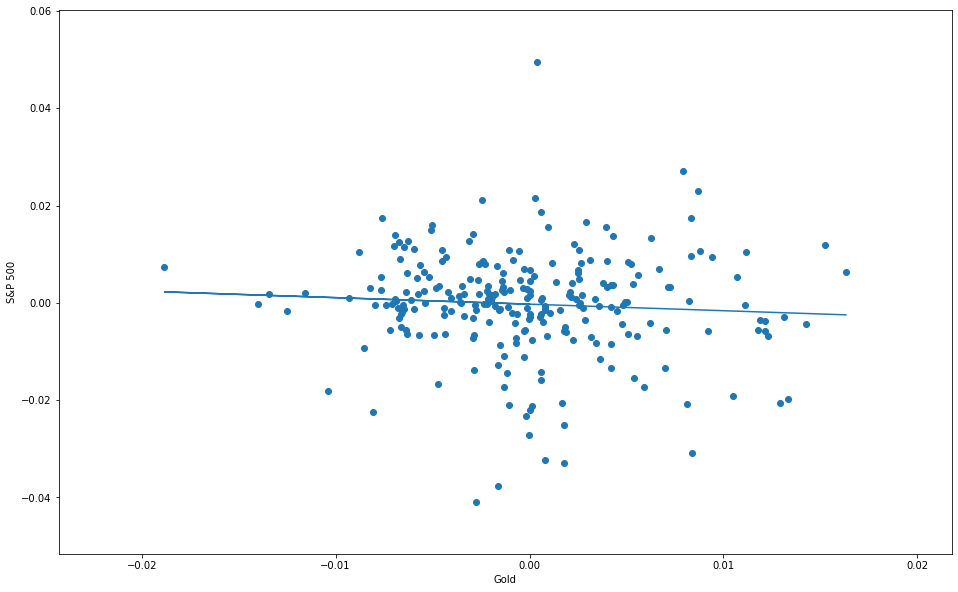

In [48]:
# gold
plt.xlabel('Gold')
plt.ylabel('S&P 500')
plt.scatter(gold[:len(dfsp500)]['% change Gold'], dfsp500['% change S&P 500'])
plt.plot(gold[1:]['% change Gold'], gold_pred)

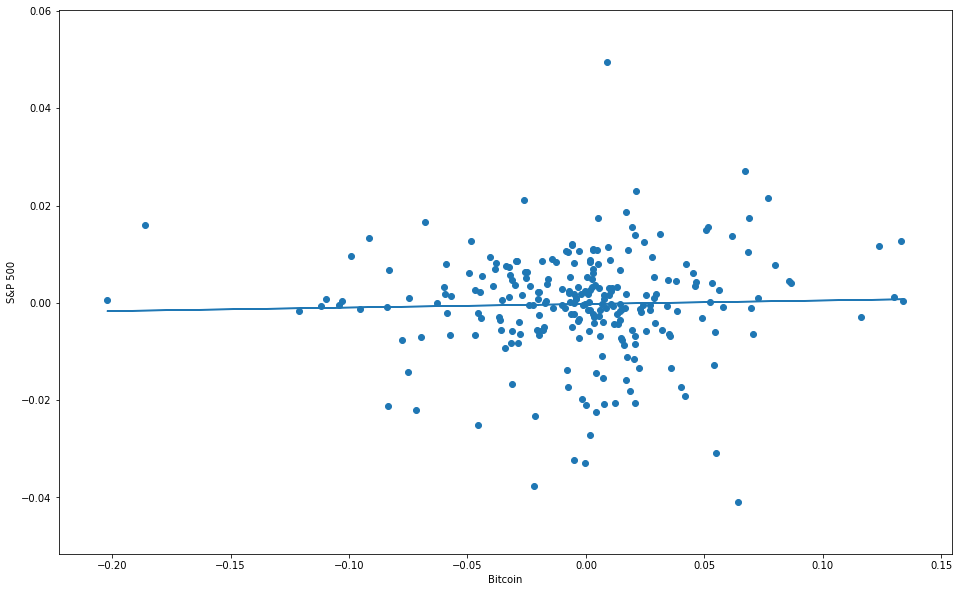

In [49]:
# bitcoin
plt.xlabel('Bitcoin')
plt.ylabel('S&P 500')
plt.scatter(bitcoin[:len(dfsp500)]['% change Bitcoin'], dfsp500['% change S&P 500'])
plt.plot(bitcoin[1:]['% change Bitcoin'], bitcoin_pred)

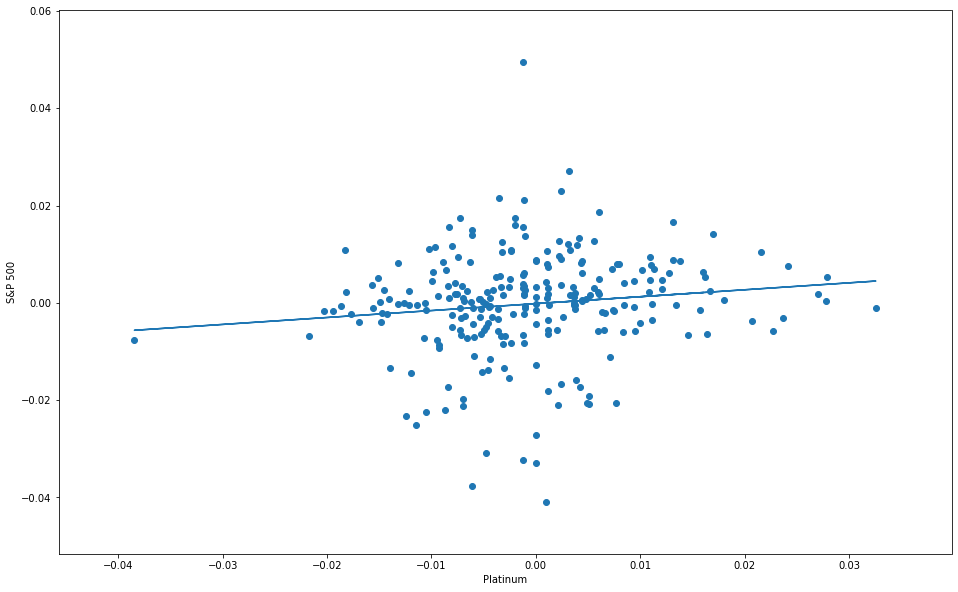

In [50]:
# platinum
plt.xlabel('Platinum')
plt.ylabel('S&P 500')
plt.scatter(dfplatinum[:len(dfsp500)]['% change Platinum'], dfsp500['% change S&P 500'])
plt.plot(dfplatinum[1:]['% change Platinum'], platinum_pred)

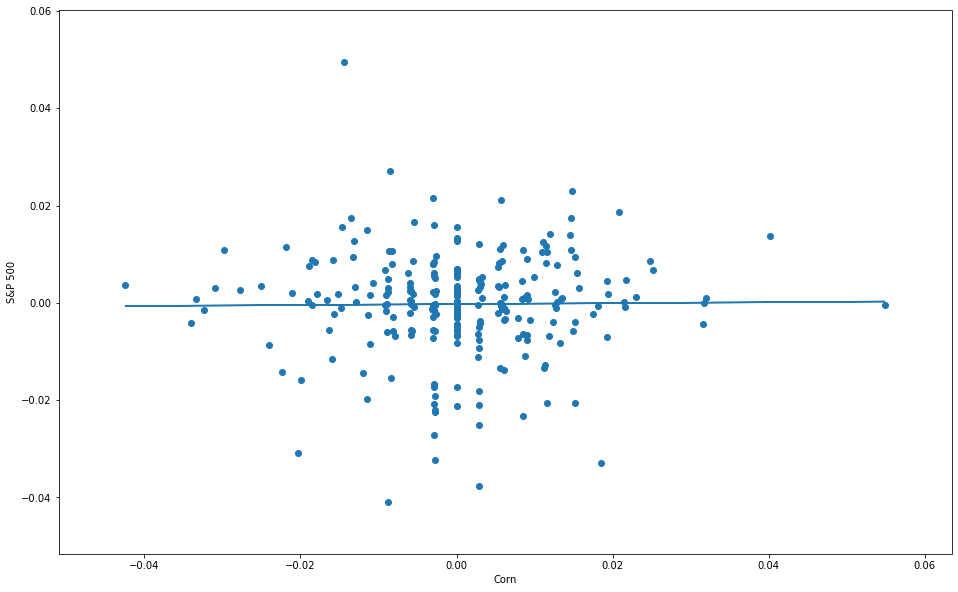

In [51]:
# corn
plt.xlabel('Corn')
plt.ylabel('S&P 500')
plt.scatter(dfcorn['% change Corn'], dfsp500['% change S&P 500'])
plt.plot(dfcorn[1:]['% change Corn'], corn_pred)

Section C. Calculate and display the intercept, coefficient (slope), R2, and the Mean squared error.

In [52]:
# palladium
print("Intercept: ", regpalladium.intercept_)
print("Coefficient: ", regpalladium.coef_)
print('R2: ', r2_score(dfsp500[1:]['% change S&P 500'], palladium_pred[:len(dfsp500) - 1]))
print("Mean Squared error: ", mean_squared_error(dfsp500[1:]['% change S&P 500'], palladium_pred[:len(dfsp500) - 1]))

Intercept:  [-0.00023524]
Coefficient:  [[0.00953853]]
R2:  0.007494160102065273
Mean Squared error:  0.00011422640409639049


In [53]:
# gold
print("Intercept:",reggold.intercept_)
print("Coefficient:",reggold.coef_)
print('R2: ', r2_score(dfsp500[1:]['% change S&P 500'], gold_pred[:len(dfsp500) - 1]))
print("Mean Squared error: ", mean_squared_error(dfsp500[1:]['% change S&P 500'], gold_pred[:len(dfsp500) - 1]))

Intercept: [-0.00023524]
Coefficient: [[0.00953853]]
R2:  0.004941310944051702
Mean Squared error:  0.00011452020869460867


In [54]:
# bitcoin
print("Intercept:",regbitcoin.intercept_)
print("Coefficient:",regbitcoin.coef_)
print('R2: ', r2_score(dfsp500[1:]['% change S&P 500'], bitcoin_pred[:len(dfsp500) - 1]))
print("Mean Squared error: ", mean_squared_error(dfsp500[1:]['% change S&P 500'], bitcoin_pred[:len(dfsp500) - 1]))

Intercept: [-0.00023524]
Coefficient: [[0.00953853]]
R2:  0.0009362897614328958
Mean Squared error:  0.00011498114217190434


In [55]:
# platinum
print("Intercept:",regplatinum.intercept_)
print("Coefficient:",regplatinum.coef_)
print('R2: ', r2_score(dfsp500[1:]['% change S&P 500'], platinum_pred[:len(dfsp500) - 1]))
print("Mean Squared error: ", mean_squared_error(dfsp500[1:]['% change S&P 500'], platinum_pred[:len(dfsp500) - 1]))

Intercept: [-0.00023524]
Coefficient: [[0.00953853]]
R2:  0.016645910525782015
Mean Squared error:  0.00011317313921867826


In [56]:
# corn
print("Intercept:",regcorn.intercept_)
print("Coefficient:",regcorn.coef_)
print('R2: ', r2_score(dfsp500[1:]['% change S&P 500'], corn_pred))
print("Mean Squared error: ", mean_squared_error(dfsp500[1:]['% change S&P 500'], corn_pred))

Intercept: [-0.00023524]
Coefficient: [[0.00953853]]
R2:  0.00012639056604701882
Mean Squared error:  0.00011507435257838315


Section D. Which asset is highly correlated with the S&P 500 and which asset is the least correlated?

In [57]:
a = palladium.corr(sp500_close)

In [58]:
b = platinum.corr(sp500_close)

In [59]:
c = corn.corr(sp500_close)

In [60]:
d = gold['% change Gold'].corr(sp500_close)

In [61]:
e = bitcoin['% change Bitcoin'].corr(sp500_close)

In [62]:
dt = {'Correlation with S&P 500':[e, c, d, a, b]}
combinecorr= pd.DataFrame(dt, columns=['Correlation with S&P 500'], index = ['Bitcoin', 'Corn', 'Gold', 'Palladium', 'Platinum'])
combinecorr

,Correlation with S&P 500
Bitcoin,-0.080132
Corn,-0.003147
Gold,0.067121
Palladium,0.143270
Platinum,0.120954


In [63]:
print("The higlest", combinecorr.idxmax(axis=0, skipna=True))

The higlest Correlation with S&P 500    Palladium
dtype: object


In [64]:
print("The lowest", combinecorr.idxmin(axis=0, skipna=True))

The lowest Correlation with S&P 500    Bitcoin
dtype: object
